In [1]:
import pandas as pd
import numpy as np
import re
import re as reg
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
x = pd.read_excel("HasilAkhir.xlsx")
x

,Unnamed: 0,Review,Positif,Negatif
0,0,akses jalan luas mudah mobil motor tiket masuk...,1,0
1,1,recomended buat libur sama keluarga tempat ber...,1,0
2,2,beberapa kali datang kesini tempat wisata sang...,1,0
3,3,hutan pinus milik hutan fungsi wisata konsep w...,1,0
4,4,benar tempat oke bht cuma ko apa bayar si masu...,1,0
...,...,...,...,...
394,394,tempat bagus asli asyik tempate,1,0
395,395,datang utama suka sejarah asli must come espec...,1,0
396,396,layan lebih cepat perban banyak cabang bri lai...,1,0
397,397,tempat bagus tahu sejarah bri asli,1,0


In [37]:
x['label'] = ''
x

,Unnamed: 0,Review,Positif,Negatif,label
0,0,akses jalan luas mudah mobil motor tiket masuk...,1,0,
1,1,recomended buat libur sama keluarga tempat ber...,1,0,
2,2,beberapa kali datang kesini tempat wisata sang...,1,0,
3,3,hutan pinus milik hutan fungsi wisata konsep w...,1,0,
4,4,benar tempat oke bht cuma ko apa bayar si masu...,1,0,
...,...,...,...,...,...
394,394,tempat bagus asli asyik tempate,1,0,
395,395,datang utama suka sejarah asli must come espec...,1,0,
396,396,layan lebih cepat perban banyak cabang bri lai...,1,0,
397,397,tempat bagus tahu sejarah bri asli,1,0,


In [38]:
for i in x.index:
    if x.at[i, 'Positif'] == 1:
        x.at[i,'label'] = 1
    if x.at[i,'Negatif'] == -1:
        x.at[i,'label'] = -1
    if ((x.at[i, 'Negatif'] == 0) and (x.at[i, 'Positif'] == 0)):
        x.at[i, 'label'] = 0
x

,Unnamed: 0,Review,Positif,Negatif,label
0,0,akses jalan luas mudah mobil motor tiket masuk...,1,0,1
1,1,recomended buat libur sama keluarga tempat ber...,1,0,1
2,2,beberapa kali datang kesini tempat wisata sang...,1,0,1
3,3,hutan pinus milik hutan fungsi wisata konsep w...,1,0,1
4,4,benar tempat oke bht cuma ko apa bayar si masu...,1,0,1
...,...,...,...,...,...
394,394,tempat bagus asli asyik tempate,1,0,1
395,395,datang utama suka sejarah asli must come espec...,1,0,1
396,396,layan lebih cepat perban banyak cabang bri lai...,1,0,1
397,397,tempat bagus tahu sejarah bri asli,1,0,1


In [39]:
#Hapus kolom positif dan negatif
x.drop(['Positif', 'Negatif'], axis = 1, inplace = True)
x

,Unnamed: 0,Review,label
0,0,akses jalan luas mudah mobil motor tiket masuk...,1
1,1,recomended buat libur sama keluarga tempat ber...,1
2,2,beberapa kali datang kesini tempat wisata sang...,1
3,3,hutan pinus milik hutan fungsi wisata konsep w...,1
4,4,benar tempat oke bht cuma ko apa bayar si masu...,1
...,...,...,...
394,394,tempat bagus asli asyik tempate,1
395,395,datang utama suka sejarah asli must come espec...,1
396,396,layan lebih cepat perban banyak cabang bri lai...,1
397,397,tempat bagus tahu sejarah bri asli,1


In [40]:
positif = x[x['label'] == 1]['label'].count()
netral = x[x['label'] == 0]['label'].count()
negatif = x[x['label'] == -1]['label'].count()
print('Label Sentimen Positif:', positif)
print('Label Sentimen Netral:', netral)
print('Label Sentimen Negatif:', negatif)

Label Sentimen Positif: 268
Label Sentimen Netral: 83
Label Sentimen Negatif: 48


In [41]:
#Vektorisasi dgn TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
objek_vektorizer = TfidfVectorizer()
vektor_x = objek_vektorizer.fit_transform(x['Review']).toarray()
vektor_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
type (vektor_x)

numpy.ndarray

In [43]:
#Cek jumlah features
jumlah = objek_vektorizer.get_feature_names()
print("Jumlah Fitur Kata yang Dihasilkan: ", len(jumlah))

Jumlah Fitur Kata yang Dihasilkan:  1500


In [44]:
#buat objek baru objek_vektorizer_100
objek_vektorizer_100 = TfidfVectorizer(max_features=100)

#proses vektorisasi
vektor_X_100 = objek_vektorizer_100.fit_transform(x['Review']).toarray()

#mencari 100 fitur pertama
jumlah_fitur_100 = objek_vektorizer_100.get_feature_names()
print("Jumlah 100 fitur kata yang dihasilkan dari proses vektorisasi :",len (jumlah_fitur_100))
print("\n")
#tampilkan 100 fitur kata pertama
print(jumlah_fitur_100)

#Tampiljkan bobot 100 fitur pertama
print("\n\n Ini 100 fitur kata:")
print(vektor_X_100)

Jumlah 100 fitur kata yang dihasilkan dari proses vektorisasi : 100


['adem', 'ajar', 'alam', 'anak', 'and', 'asli', 'asri', 'awal', 'awat', 'bagus', 'baik', 'banget', 'bangun', 'bank', 'banyak', 'baru', 'baturaden', 'bayar', 'beberapa', 'bersih', 'bri', 'buat', 'cocok', 'cukup', 'dapat', 'dingin', 'diri', 'dulu', 'edukasi', 'enak', 'for', 'foto', 'gratis', 'harga', 'hari', 'hutan', 'indah', 'indonesia', 'isi', 'jadi', 'jalan', 'jaman', 'jauh', 'kali', 'kalo', 'keluarga', 'keren', 'kesini', 'koleksi', 'kota', 'kunjung', 'kuno', 'lantai', 'lengkap', 'libur', 'lokasi', 'luas', 'lumayan', 'main', 'masa', 'masuk', 'mata', 'mesin', 'mudah', 'museum', 'nyaman', 'of', 'orang', 'pandang', 'parkir', 'pas', 'perban', 'pernah', 'pertama', 'pinus', 'place', 'purwokerto', 'rakyat', 'rb', 'salah', 'sama', 'sangat', 'satu', 'segar', 'sejarah', 'sejuk', 'sekali', 'sini', 'spot', 'suka', 'tahu', 'tempat', 'the', 'this', 'tiket', 'to', 'toilet', 'uang', 'udara', 'wisata']


 Ini 100 fitur kata:
[[0.   

In [46]:
from sklearn.model_selection import train_test_split
y=x['label']
y=y.astype('int')

In [61]:
x_train, x_test,y_train, y_test = train_test_split(vektor_x,y,test_size=0.2,random_state=0)

# Naive Bayes

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
model_MNB = MultinomialNB()
model_BNB = BernoulliNB()

In [64]:
model_MNB.fit(x_train, y_train)

MultinomialNB()

In [65]:
model_BNB.fit(x_train, y_train)

BernoulliNB()

In [67]:
from sklearn.metrics import accuracy_score
y_pred = model_MNB.predict(x_test)
print('Skor akurasi menggunakan Multinomial Naive Bayes')
accuracy_score(y_test, y_pred)

Skor akurasi menggunakan Multinomial Naive Bayes


0.7125

In [69]:
from sklearn.metrics import accuracy_score
y_predd= model_BNB.predict(x_test)
print('Skor akurasi menggunakan Bernoulli Naive Bayes')
accuracy_score(y_test, y_predd)

Skor akurasi menggunakan Bernoulli Naive Bayes


0.7

In [73]:
# Menguji akurasi dari model menggunakan metode confussion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_predd = model_BNB.predict(x_test)
print(" TABEL CONFUSSION MATRIX")
print("==========================")
print(confusion_matrix(y_test,y_predd, labels=[1,0,-1]))
print(" TABEL AKURASI")
print("====================================================")
print(classification_report(y_test,y_predd))

 TABEL CONFUSSION MATRIX
[[55  0  2]
 [15  0  0]
 [ 7  0  1]]
 TABEL AKURASI
              precision    recall  f1-score   support

          -1       0.33      0.12      0.18         8
           0       0.00      0.00      0.00        15
           1       0.71      0.96      0.82        57

    accuracy                           0.70        80
   macro avg       0.35      0.36      0.33        80
weighted avg       0.54      0.70      0.60        80



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


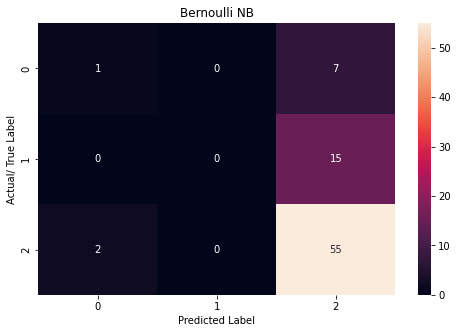

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predd), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual/ True Label")
plt.title("Bernoulli NB")
plt.show()

# Support vector Machine

In [78]:
from sklearn.svm import SVC
model_SVM = SVC(random_state=0)
model_SVM.fit(x_train, y_train)

SVC(random_state=0)

In [79]:
from sklearn.metrics import accuracy_score
y_preds = model_SVM.predict(x_test)
accuracy_score(y_test, y_preds)

0.7375

In [83]:
# Menguji akurasi dari model menggunakan confussion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model_SVM.predict(x_test)
print(" TABEL CONFUSSION MATRIX")
print("==========================")
print(confusion_matrix(y_test,y_preds, labels=[1,0,-1]))
print(" TABEL AKURASI")
print("====================================================")
print(classification_report(y_test,y_preds))

 TABEL CONFUSSION MATRIX
[[57  0  0]
 [13  2  0]
 [ 8  0  0]]
 TABEL AKURASI
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         8
           0       1.00      0.13      0.24        15
           1       0.73      1.00      0.84        57

    accuracy                           0.74        80
   macro avg       0.58      0.38      0.36        80
weighted avg       0.71      0.74      0.65        80



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


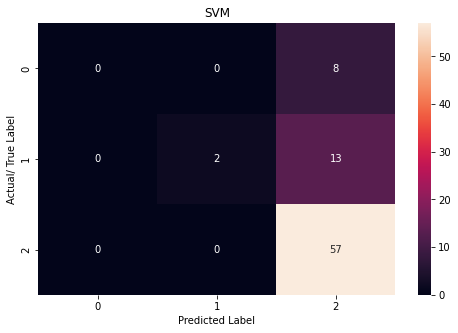

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual/ True Label")
plt.title("SVM")
plt.show()

# Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier as DTC
model_DTC = DTC()

In [89]:
model_DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [90]:
y_predss = model_DTC.predict(x_test)
accuracy_score(y_test,y_predss)

0.7375

In [93]:
# Menguji akurasi dari model menggunakan confussion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model_DTC.predict(x_test)
print(" TABEL CONFUSSION MATRIX")
print("==========================")
print(confusion_matrix(y_test,y_predss, labels=[1,0,-1]))
print(" TABEL AKURASI")
print("====================================================")
print(classification_report(y_test,y_predss))

 TABEL CONFUSSION MATRIX
[[48  8  1]
 [10  5  0]
 [ 2  0  6]]
 TABEL AKURASI
              precision    recall  f1-score   support

          -1       0.86      0.75      0.80         8
           0       0.38      0.33      0.36        15
           1       0.80      0.84      0.82        57

    accuracy                           0.74        80
   macro avg       0.68      0.64      0.66        80
weighted avg       0.73      0.74      0.73        80



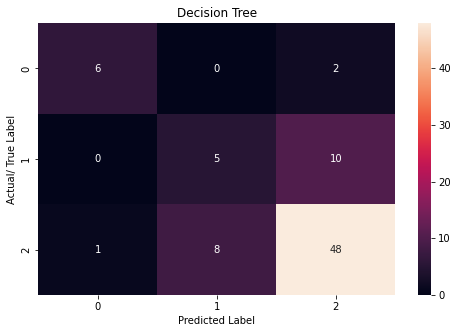

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predss), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual/ True Label")
plt.title("Decision Tree")
plt.show()

# Kesimpulan
Dengan menggunakan komentar Hutan Pinus Limpakuwus dan Museum BRI pada data Hasil Program, diperoleh hasil:
1. Bernoulli Naive Bayes
Akurasi yang didapatkan sebesar 0.7 dengan 55 benar
2. Support Vector Machine
Akurasi yang didapatkan sebesar 0.7375 dengan 57 benar
3. Decision Tree
Akurasi yang didapatkan sebesar 0.7375 dengan 48 benar